# EDA on restaurant data -

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Importing required libraries -
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load and view data -

In [ ]:
# Load data -
# /content/drive/MyDrive/BE PROJECT/Data/dummy_data_for_predection.csv
# /content/drive/MyDrive/dummy_data_for_predection.csv
df = pd.read_csv('/content/drive/MyDrive/BE PROJECT/Data/resto_data.csv') # prajakta sid
# df = pd.read_csv('/content/drive/MyDrive/BE PROJECT/Data/resto_data.csv') # rasika
df

,id,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,...,mtd_breakfast_share_of_business,mtd_lunch_share_of_business,mtd_dinner_share_of_business,mtd_covers_share_of_business,mtd_breakfast_covers_mix_of_business,mtd_lunch_covers_mix_of_business,mtd_dinner_covers_mix_of_business,mtd_food_mix_of_business,mtd_food_share_of_business,date
0,1624849743,556,5,2022,2,3,123,0,19,339,...,9.9,10.2,9.7,17.4,49.8,15.1,35.3,134.9,13.6,2022-05-03
1,1624849745,556,5,2022,4,5,125,0,19,370,...,11.2,11.5,11.1,17.6,42.7,20.5,37.0,135.7,15.4,2022-05-05
2,1624849746,556,5,2022,5,6,126,0,19,327,...,11.3,11.9,11.4,17.7,43.8,20.9,35.4,136.9,15.9,2022-05-06
3,1624849747,556,5,2022,6,7,127,1,19,231,...,11.0,11.7,11.1,17.5,45.4,19.7,35.0,137.5,15.7,2022-05-07
4,1624849748,556,5,2022,0,8,128,1,20,282,...,10.8,11.3,10.9,17.4,45.2,19.3,35.5,137.0,15.3,2022-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69747,1624849736,556,4,2022,2,26,116,3,18,0,...,13.1,13.3,10.0,14.9,45.4,26.5,28.2,137.9,16.9,2022-04-26
69748,1624849737,556,4,2022,3,27,117,3,18,0,...,13.3,13.4,10.1,14.7,45.4,26.5,28.2,138.3,17.2,2022-04-27
69749,1624849738,556,4,2022,4,28,118,4,18,4562,...,13.4,13.3,10.3,18.1,46.3,24.6,29.2,138.3,17.3,2022-04-28
69750,1624849739,556,4,2022,5,29,119,4,18,0,...,13.5,13.3,10.5,17.9,46.3,24.6,29.2,138.6,17.4,2022-04-29


In [ ]:
df['restaurant_id'].nunique()

66

In [ ]:
df.shape

(69752, 105)

In [ ]:
# Looking at the columns of the dataset with their corresponding data types -
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69752 entries, 0 to 69751
Columns: 105 entries, id to date
dtypes: float64(89), int64(13), object(3)
memory usage: 55.9+ MB


In [ ]:
df.nunique()

id                                   69752
restaurant_id                           66
month                                   12
year                                     6
day_of_week                              7
                                     ...  
mtd_lunch_covers_mix_of_business       870
mtd_dinner_covers_mix_of_business      985
mtd_food_mix_of_business              1156
mtd_food_share_of_business             968
date                                  1854
Length: 105, dtype: int64

### Description of the columns -
* restaurant_id: Every restaurant is identified by a unique id
* date: The date when the data was captured
* covers_count: The number of tables served (number of bills generated)
* beverages: The revenue of the business from beverages
* food: The revenue of the business from food
* other: The revenue of the business from items other than food and beverages (wherever applicable)
* day_of_week: The day of the week
* day_of_month: The day of the month
* day_of_year: The day of the year
* week_of_year: The week of the year
* month
* year
* week_of_month

In [ ]:
# Looking at statistics of the dataset -
df.describe()

,id,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,...,mtd_other_share_of_business,mtd_breakfast_share_of_business,mtd_lunch_share_of_business,mtd_dinner_share_of_business,mtd_covers_share_of_business,mtd_breakfast_covers_mix_of_business,mtd_lunch_covers_mix_of_business,mtd_dinner_covers_mix_of_business,mtd_food_mix_of_business,mtd_food_share_of_business
count,6.975200e+04,69752.000000,69752.000000,69752.000000,69752.000000,69752.000000,69752.000000,69752.000000,69752.000000,69752.000000,...,32259.0,32833.0,32964.000,32747.0,32858.0,33065.000000,33066.000000,33062.000000,32724.000000,32567.0
mean,6.584731e+08,532.311389,6.458897,2020.646175,2.998882,15.747491,181.192840,1.834198,26.403343,186.422870,...,inf,NaN,NaN,inf,inf,19.427053,24.081434,51.114388,71.009592,inf
std,7.377207e+08,169.879411,3.509606,1.252416,2.000186,8.802470,107.253934,1.293401,15.329712,336.365274,...,NaN,NaN,NaN,NaN,NaN,23.452828,17.078773,26.774785,28.796651,NaN
min,1.000000e+00,1.000000,1.000000,2018.000000,0.000000,1.000000,1.000000,0.000000,1.000000,-4400.000000,...,-461.2,-inf,-inf,-327.5,-112.3,-774.100000,0.000000,-250.600000,-1662.500000,-65.2
25%,1.000134e+08,508.000000,3.000000,2020.000000,1.000000,8.000000,88.000000,1.000000,13.000000,17.000000,...,0.0,1.5,8.900,14.0,14.5,0.000000,14.000000,31.625000,66.800000,14.2
50%,1.000317e+08,525.000000,6.000000,2021.000000,3.000000,16.000000,181.000000,2.000000,26.000000,68.000000,...,0.0,19.2,21.000,25.3,23.9,10.900000,23.700000,52.800000,78.100000,24.5
75%,1.624843e+09,546.000000,10.000000,2022.000000,5.000000,23.000000,275.000000,3.000000,40.000000,223.000000,...,33.0,49.5,47.025,42.6,40.4,30.800000,32.400000,67.700000,87.600000,41.6
max,1.624861e+09,819.000000,12.000000,2023.000000,6.000000,31.000000,366.000000,4.000000,53.000000,14958.000000,...,inf,inf,inf,inf,inf,202.100000,241.300000,662.400000,258.400000,inf


In [ ]:
df = df.drop(['updated_date'],axis='columns')
df = df.drop(['created_date'],axis='columns')
# df.drop['date']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69752 entries, 0 to 69751
Columns: 103 entries, id to date
dtypes: float64(89), int64(13), object(1)
memory usage: 54.8+ MB


In [ ]:
df.isnull().sum().head(15)

id                   0
restaurant_id        0
month                0
year                 0
day_of_week          0
day_of_month         0
day_of_year          0
week_of_month        0
week_of_year         0
total_covers         0
total_revenue        0
food_revenue         0
beverages_revenue    9
other_revenue        9
breakfast_revenue    0
dtype: int64

In [ ]:
df.isnull().sum().tail(15)

### What to do about these NaN values??

mtd_beverages_mix_of_business           37040
mtd_other_mix_of_business               36776
mtd_covers_mix_of_business              36686
mtd_beverages_share_of_business         37542
mtd_other_share_of_business             37493
mtd_breakfast_share_of_business         36919
mtd_lunch_share_of_business             36788
mtd_dinner_share_of_business            37005
mtd_covers_share_of_business            36894
mtd_breakfast_covers_mix_of_business    36687
mtd_lunch_covers_mix_of_business        36686
mtd_dinner_covers_mix_of_business       36690
mtd_food_mix_of_business                37028
mtd_food_share_of_business              37185
date                                        0
dtype: int64

In [ ]:
# Remove Covid months -
df_without_covid = df[(df['month'] != 4 & (df['year'] == 2020)) & (df['month'] != 5 & (df['year'] == 2020)) & (df['month'] != 6 & (df['year'] == 2020)) & (df['month'] != 7 & (df['year'] == 2020))]
df_without_covid

,id,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,...,mtd_breakfast_share_of_business,mtd_lunch_share_of_business,mtd_dinner_share_of_business,mtd_covers_share_of_business,mtd_breakfast_covers_mix_of_business,mtd_lunch_covers_mix_of_business,mtd_dinner_covers_mix_of_business,mtd_food_mix_of_business,mtd_food_share_of_business,date
0,1624849743,556,5,2022,2,3,123,0,19,339,...,9.9,10.2,9.7,17.4,49.8,15.1,35.3,134.9,13.6,2022-05-03
1,1624849745,556,5,2022,4,5,125,0,19,370,...,11.2,11.5,11.1,17.6,42.7,20.5,37.0,135.7,15.4,2022-05-05
2,1624849746,556,5,2022,5,6,126,0,19,327,...,11.3,11.9,11.4,17.7,43.8,20.9,35.4,136.9,15.9,2022-05-06
3,1624849747,556,5,2022,6,7,127,1,19,231,...,11.0,11.7,11.1,17.5,45.4,19.7,35.0,137.5,15.7,2022-05-07
4,1624849748,556,5,2022,0,8,128,1,20,282,...,10.8,11.3,10.9,17.4,45.2,19.3,35.5,137.0,15.3,2022-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69747,1624849736,556,4,2022,2,26,116,3,18,0,...,13.1,13.3,10.0,14.9,45.4,26.5,28.2,137.9,16.9,2022-04-26
69748,1624849737,556,4,2022,3,27,117,3,18,0,...,13.3,13.4,10.1,14.7,45.4,26.5,28.2,138.3,17.2,2022-04-27
69749,1624849738,556,4,2022,4,28,118,4,18,4562,...,13.4,13.3,10.3,18.1,46.3,24.6,29.2,138.3,17.3,2022-04-28
69750,1624849739,556,4,2022,5,29,119,4,18,0,...,13.5,13.3,10.5,17.9,46.3,24.6,29.2,138.6,17.4,2022-04-29


In [ ]:
# df.loc[df_without_covid['year']==2020]

In [ ]:
df_3 = df_without_covid

In [ ]:
df_without_covid_without_na = df_without_covid.dropna(axis=0, subset=['total_revenue'])
df_without_covid_without_na

,id,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,...,mtd_breakfast_share_of_business,mtd_lunch_share_of_business,mtd_dinner_share_of_business,mtd_covers_share_of_business,mtd_breakfast_covers_mix_of_business,mtd_lunch_covers_mix_of_business,mtd_dinner_covers_mix_of_business,mtd_food_mix_of_business,mtd_food_share_of_business,date
0,1624849743,556,5,2022,2,3,123,0,19,339,...,9.9,10.2,9.7,17.4,49.8,15.1,35.3,134.9,13.6,2022-05-03
1,1624849745,556,5,2022,4,5,125,0,19,370,...,11.2,11.5,11.1,17.6,42.7,20.5,37.0,135.7,15.4,2022-05-05
2,1624849746,556,5,2022,5,6,126,0,19,327,...,11.3,11.9,11.4,17.7,43.8,20.9,35.4,136.9,15.9,2022-05-06
3,1624849747,556,5,2022,6,7,127,1,19,231,...,11.0,11.7,11.1,17.5,45.4,19.7,35.0,137.5,15.7,2022-05-07
4,1624849748,556,5,2022,0,8,128,1,20,282,...,10.8,11.3,10.9,17.4,45.2,19.3,35.5,137.0,15.3,2022-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69747,1624849736,556,4,2022,2,26,116,3,18,0,...,13.1,13.3,10.0,14.9,45.4,26.5,28.2,137.9,16.9,2022-04-26
69748,1624849737,556,4,2022,3,27,117,3,18,0,...,13.3,13.4,10.1,14.7,45.4,26.5,28.2,138.3,17.2,2022-04-27
69749,1624849738,556,4,2022,4,28,118,4,18,4562,...,13.4,13.3,10.3,18.1,46.3,24.6,29.2,138.3,17.3,2022-04-28
69750,1624849739,556,4,2022,5,29,119,4,18,0,...,13.5,13.3,10.5,17.9,46.3,24.6,29.2,138.6,17.4,2022-04-29


In [ ]:
count = (df_3['total_revenue'] == 0).sum()
print('Count of zeros in Column  C : ', count)

Count of zeros in Column  C :  11824


In [ ]:
df_final = df_3.loc[df_3['total_revenue'] != 0]
df_final

,id,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,...,mtd_breakfast_share_of_business,mtd_lunch_share_of_business,mtd_dinner_share_of_business,mtd_covers_share_of_business,mtd_breakfast_covers_mix_of_business,mtd_lunch_covers_mix_of_business,mtd_dinner_covers_mix_of_business,mtd_food_mix_of_business,mtd_food_share_of_business,date
0,1624849743,556,5,2022,2,3,123,0,19,339,...,9.9,10.2,9.7,17.4,49.8,15.1,35.3,134.9,13.6,2022-05-03
1,1624849745,556,5,2022,4,5,125,0,19,370,...,11.2,11.5,11.1,17.6,42.7,20.5,37.0,135.7,15.4,2022-05-05
2,1624849746,556,5,2022,5,6,126,0,19,327,...,11.3,11.9,11.4,17.7,43.8,20.9,35.4,136.9,15.9,2022-05-06
3,1624849747,556,5,2022,6,7,127,1,19,231,...,11.0,11.7,11.1,17.5,45.4,19.7,35.0,137.5,15.7,2022-05-07
4,1624849748,556,5,2022,0,8,128,1,20,282,...,10.8,11.3,10.9,17.4,45.2,19.3,35.5,137.0,15.3,2022-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69747,1624849736,556,4,2022,2,26,116,3,18,0,...,13.1,13.3,10.0,14.9,45.4,26.5,28.2,137.9,16.9,2022-04-26
69748,1624849737,556,4,2022,3,27,117,3,18,0,...,13.3,13.4,10.1,14.7,45.4,26.5,28.2,138.3,17.2,2022-04-27
69749,1624849738,556,4,2022,4,28,118,4,18,4562,...,13.4,13.3,10.3,18.1,46.3,24.6,29.2,138.3,17.3,2022-04-28
69750,1624849739,556,4,2022,5,29,119,4,18,0,...,13.5,13.3,10.5,17.9,46.3,24.6,29.2,138.6,17.4,2022-04-29


In [ ]:
df_final = df_final.loc[df_3['total_covers'] != 0]
df_final

,id,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,...,mtd_breakfast_share_of_business,mtd_lunch_share_of_business,mtd_dinner_share_of_business,mtd_covers_share_of_business,mtd_breakfast_covers_mix_of_business,mtd_lunch_covers_mix_of_business,mtd_dinner_covers_mix_of_business,mtd_food_mix_of_business,mtd_food_share_of_business,date
0,1624849743,556,5,2022,2,3,123,0,19,339,...,9.9,10.2,9.7,17.4,49.8,15.1,35.3,134.9,13.6,2022-05-03
1,1624849745,556,5,2022,4,5,125,0,19,370,...,11.2,11.5,11.1,17.6,42.7,20.5,37.0,135.7,15.4,2022-05-05
2,1624849746,556,5,2022,5,6,126,0,19,327,...,11.3,11.9,11.4,17.7,43.8,20.9,35.4,136.9,15.9,2022-05-06
3,1624849747,556,5,2022,6,7,127,1,19,231,...,11.0,11.7,11.1,17.5,45.4,19.7,35.0,137.5,15.7,2022-05-07
4,1624849748,556,5,2022,0,8,128,1,20,282,...,10.8,11.3,10.9,17.4,45.2,19.3,35.5,137.0,15.3,2022-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69739,1624849727,556,4,2022,0,17,107,2,17,347,...,12.5,13.2,10.6,16.1,44.7,26.8,28.5,140.7,16.9,2022-04-17
69740,1624849728,556,4,2022,1,18,108,2,17,370,...,12.4,13.2,10.5,16.2,45.2,26.3,28.5,139.5,16.7,2022-04-18
69741,1624849729,556,4,2022,2,19,109,2,17,438,...,12.6,13.4,10.5,16.4,45.4,26.8,27.8,139.6,16.9,2022-04-19
69749,1624849738,556,4,2022,4,28,118,4,18,4562,...,13.4,13.3,10.3,18.1,46.3,24.6,29.2,138.3,17.3,2022-04-28


In [ ]:
df_final_2 = df_final[['restaurant_id', 'month', 'year', 'day_of_week', 'day_of_month', 'day_of_year', 'week_of_month', 'week_of_year', 'total_covers', 'food_revenue', 'beverages_revenue', 'other_revenue', 'total_revenue', 'total_apc']]

In [ ]:
# from google.colab import files
# df_final_2.to_csv('output.csv', encoding = 'utf-8-sig')
# files.download('output.csv')

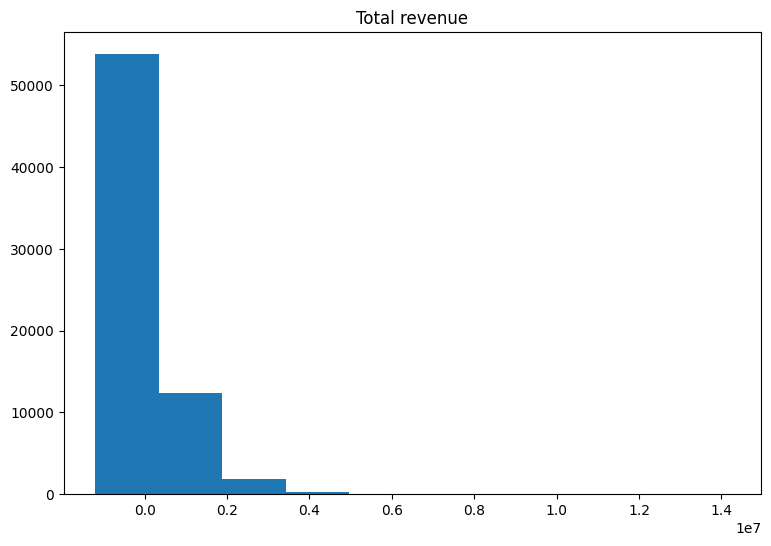

In [ ]:
plt.figure(figsize=(9,6))
plt.hist(x=df_without_covid.total_revenue, histtype='stepfilled')
plt.title("Total revenue")
plt.show()

In [ ]:
def replace_zero_of_total_revenue(restaurant_id):
  pass

#EDA

In [ ]:
import seaborn as sns

In [ ]:
df_1 = df.drop(['date'],axis='columns')

In [ ]:
df_2 = df_1.loc[:,'restaurant_id':'dinner_apc']
df_2

,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,total_revenue,...,breakfast_revenue,lunch_revenue,dinner_revenue,breakfast_covers,lunch_covers,dinner_covers,total_apc,breakfast_apc,lunch_apc,dinner_apc
0,556,5,2022,2,3,123,0,19,339,94040.0,...,27360.0,44029.0,22650.0,154,79,106,277.402762,177.662338,557.329114,213.679245
1,556,5,2022,4,5,125,0,19,370,102039.0,...,31989.0,40628.0,29422.0,189,75,106,275.781234,169.253968,541.706667,277.566038
2,556,5,2022,5,6,126,0,19,327,81028.0,...,19179.0,39898.0,21952.0,164,75,88,247.793514,116.945122,531.973333,249.454545
3,556,5,2022,6,7,127,1,19,231,43510.0,...,19733.0,4635.0,19141.0,138,21,71,188.354937,142.992754,220.714286,269.591549
4,556,5,2022,0,8,128,1,20,282,73062.0,...,14567.0,19417.0,39078.0,121,46,114,259.083704,120.388430,422.108696,342.789474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69747,556,4,2022,2,26,116,3,18,0,90380.0,...,39020.0,32252.0,19109.0,0,0,0,0.000000,0.000000,0.000000,0.000000
69748,556,4,2022,3,27,117,3,18,0,165125.0,...,71289.0,58924.0,34912.0,0,0,0,0.000000,0.000000,0.000000,0.000000
69749,556,4,2022,4,28,118,4,18,4562,123239.0,...,45923.0,44747.0,32569.0,2169,1004,1389,27.014164,21.172430,44.568725,23.447804
69750,556,4,2022,5,29,119,4,18,0,124668.0,...,46455.0,45266.0,32947.0,0,0,0,0.000000,0.000000,0.000000,0.000000


In [ ]:
# Looking at correlation among the columns -
# plt.figure(figsize=(20,20))
# sns.heatmap(df_2)
# df_2.style.background_gradient(cmap ='viridis').set_properties(**{'font-size': '20px'})
# plt.plot()
#df.corr()



corr = df_2.corr()

# Displaying dataframe as an heatmap
# with diverging colourmap as coolwarm
corr.style.background_gradient(cmap ='coolwarm')

,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,total_revenue,food_revenue,beverages_revenue,other_revenue,breakfast_revenue,lunch_revenue,dinner_revenue,breakfast_covers,lunch_covers,dinner_covers,total_apc,breakfast_apc,lunch_apc,dinner_apc
restaurant_id,1.000000,0.000166,0.010703,0.000229,-0.001652,-0.000006,-0.001557,0.002222,0.212250,0.195440,0.173590,0.205940,0.077896,0.120135,0.104806,0.175573,0.197901,0.168254,0.144890,-0.013432,0.002589,-0.020178,-0.011163
month,0.000166,1.000000,-0.093295,0.004335,0.009745,0.996616,0.010328,0.946628,0.035220,0.045373,0.045912,0.026888,0.025581,0.019024,0.029415,0.038648,0.017680,0.022195,0.033492,0.002381,0.000969,0.008101,0.005830
year,0.010703,-0.093295,1.000000,-0.002401,0.000708,-0.093370,0.000620,-0.071594,-0.038064,-0.004284,-0.008235,-0.010796,0.033147,-0.008193,-0.017972,0.000881,-0.004008,-0.044990,-0.029691,0.016555,-0.002924,0.004796,0.005189
day_of_week,0.000229,0.004335,-0.002401,1.000000,-0.001870,0.004154,-0.002571,0.000562,0.024446,0.028966,0.020315,0.049081,0.006780,-0.001732,-0.019949,0.046512,0.005590,-0.004858,0.036737,-0.003368,0.006454,-0.008912,0.008169
day_of_month,-0.001652,0.009745,0.000708,-0.001870,1.000000,0.091626,0.976405,0.043709,0.012312,0.013425,0.011557,0.008309,0.017983,0.003310,0.008597,0.013095,0.005371,0.008296,0.011650,-0.004339,0.005554,0.003392,0.008205
day_of_year,-0.000006,0.996616,-0.093370,0.004154,0.091626,1.000000,0.090267,0.946189,0.035853,0.046054,0.046461,0.027203,0.026888,0.018946,0.029850,0.039386,0.017717,0.022609,0.034182,0.001934,0.001406,0.008320,0.006441
week_of_month,-0.001557,0.010328,0.000620,-0.002571,0.976405,0.090267,1.000000,0.042485,0.011991,0.012390,0.010717,0.006462,0.018647,0.002160,0.007485,0.012475,0.004630,0.007137,0.012027,-0.003148,0.003493,0.002706,0.006340
week_of_year,0.002222,0.946628,-0.071594,0.000562,0.043709,0.946189,0.042485,1.000000,0.035346,0.044834,0.047472,0.025669,0.015457,0.018700,0.025160,0.040079,0.016519,0.023004,0.033925,0.002229,0.001153,0.009655,0.006944
total_covers,0.212250,0.035220,-0.038064,0.024446,0.012312,0.035853,0.011991,0.035346,1.000000,0.812448,0.839926,0.562917,0.224055,0.459886,0.501446,0.715052,0.633278,0.669839,0.869718,0.002603,0.045384,0.035714,0.020790
total_revenue,0.195440,0.045373,-0.004284,0.028966,0.013425,0.046054,0.012390,0.044834,0.812448,1.000000,0.971707,0.800484,0.411015,0.486679,0.571210,0.913814,0.493369,0.571735,0.706856,0.061738,0.055560,0.069516,0.076919


In [ ]:
df_3 = df_2.loc[:,'restaurant_id':'total_revenue']
df_3['total_apc'] = df_2['total_apc']
df_3

,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,total_revenue,total_apc
0,556,5,2022,2,3,123,0,19,339,94040.0,277.402762
1,556,5,2022,4,5,125,0,19,370,102039.0,275.781234
2,556,5,2022,5,6,126,0,19,327,81028.0,247.793514
3,556,5,2022,6,7,127,1,19,231,43510.0,188.354937
4,556,5,2022,0,8,128,1,20,282,73062.0,259.083704
...,...,...,...,...,...,...,...,...,...,...,...
69747,556,4,2022,2,26,116,3,18,0,90380.0,0.000000
69748,556,4,2022,3,27,117,3,18,0,165125.0,0.000000
69749,556,4,2022,4,28,118,4,18,4562,123239.0,27.014164
69750,556,4,2022,5,29,119,4,18,0,124668.0,0.000000


In [ ]:
corr = df_3.corr()

# Displaying dataframe as an heatmap
# with diverging colourmap as coolwarm
corr.style.background_gradient(cmap ='coolwarm')

,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,total_revenue,total_apc
restaurant_id,1.000000,0.000166,0.010703,0.000229,-0.001652,-0.000006,-0.001557,0.002222,0.212250,0.195440,-0.013432
month,0.000166,1.000000,-0.093295,0.004335,0.009745,0.996616,0.010328,0.946628,0.035220,0.045373,0.002381
year,0.010703,-0.093295,1.000000,-0.002401,0.000708,-0.093370,0.000620,-0.071594,-0.038064,-0.004284,0.016555
day_of_week,0.000229,0.004335,-0.002401,1.000000,-0.001870,0.004154,-0.002571,0.000562,0.024446,0.028966,-0.003368
day_of_month,-0.001652,0.009745,0.000708,-0.001870,1.000000,0.091626,0.976405,0.043709,0.012312,0.013425,-0.004339
day_of_year,-0.000006,0.996616,-0.093370,0.004154,0.091626,1.000000,0.090267,0.946189,0.035853,0.046054,0.001934
week_of_month,-0.001557,0.010328,0.000620,-0.002571,0.976405,0.090267,1.000000,0.042485,0.011991,0.012390,-0.003148
week_of_year,0.002222,0.946628,-0.071594,0.000562,0.043709,0.946189,0.042485,1.000000,0.035346,0.044834,0.002229
total_covers,0.212250,0.035220,-0.038064,0.024446,0.012312,0.035853,0.011991,0.035346,1.000000,0.812448,0.002603
total_revenue,0.195440,0.045373,-0.004284,0.028966,0.013425,0.046054,0.012390,0.044834,0.812448,1.000000,0.061738


In [ ]:
df_2.corr()

,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,total_revenue,...,breakfast_revenue,lunch_revenue,dinner_revenue,breakfast_covers,lunch_covers,dinner_covers,total_apc,breakfast_apc,lunch_apc,dinner_apc
restaurant_id,1.000000,0.000166,0.010703,0.000229,-0.001652,-0.000006,-0.001557,0.002222,0.212250,0.195440,...,0.120135,0.104806,0.175573,0.197901,0.168254,0.144890,-0.013432,0.002589,-0.020178,-0.011163
month,0.000166,1.000000,-0.093295,0.004335,0.009745,0.996616,0.010328,0.946628,0.035220,0.045373,...,0.019024,0.029415,0.038648,0.017680,0.022195,0.033492,0.002381,0.000969,0.008101,0.005830
year,0.010703,-0.093295,1.000000,-0.002401,0.000708,-0.093370,0.000620,-0.071594,-0.038064,-0.004284,...,-0.008193,-0.017972,0.000881,-0.004008,-0.044990,-0.029691,0.016555,-0.002924,0.004796,0.005189
day_of_week,0.000229,0.004335,-0.002401,1.000000,-0.001870,0.004154,-0.002571,0.000562,0.024446,0.028966,...,-0.001732,-0.019949,0.046512,0.005590,-0.004858,0.036737,-0.003368,0.006454,-0.008912,0.008169
day_of_month,-0.001652,0.009745,0.000708,-0.001870,1.000000,0.091626,0.976405,0.043709,0.012312,0.013425,...,0.003310,0.008597,0.013095,0.005371,0.008296,0.011650,-0.004339,0.005554,0.003392,0.008205
day_of_year,-0.000006,0.996616,-0.093370,0.004154,0.091626,1.000000,0.090267,0.946189,0.035853,0.046054,...,0.018946,0.029850,0.039386,0.017717,0.022609,0.034182,0.001934,0.001406,0.008320,0.006441
week_of_month,-0.001557,0.010328,0.000620,-0.002571,0.976405,0.090267,1.000000,0.042485,0.011991,0.012390,...,0.002160,0.007485,0.012475,0.004630,0.007137,0.012027,-0.003148,0.003493,0.002706,0.006340
week_of_year,0.002222,0.946628,-0.071594,0.000562,0.043709,0.946189,0.042485,1.000000,0.035346,0.044834,...,0.018700,0.025160,0.040079,0.016519,0.023004,0.033925,0.002229,0.001153,0.009655,0.006944
total_covers,0.212250,0.035220,-0.038064,0.024446,0.012312,0.035853,0.011991,0.035346,1.000000,0.812448,...,0.459886,0.501446,0.715052,0.633278,0.669839,0.869718,0.002603,0.045384,0.035714,0.020790
total_revenue,0.195440,0.045373,-0.004284,0.028966,0.013425,0.046054,0.012390,0.044834,0.812448,1.000000,...,0.486679,0.571210,0.913814,0.493369,0.571735,0.706856,0.061738,0.055560,0.069516,0.076919


## Data Visualizations -
Visualizing the data to understand patterns and trends in it.

In [ ]:
from matplotlib.pyplot import figure

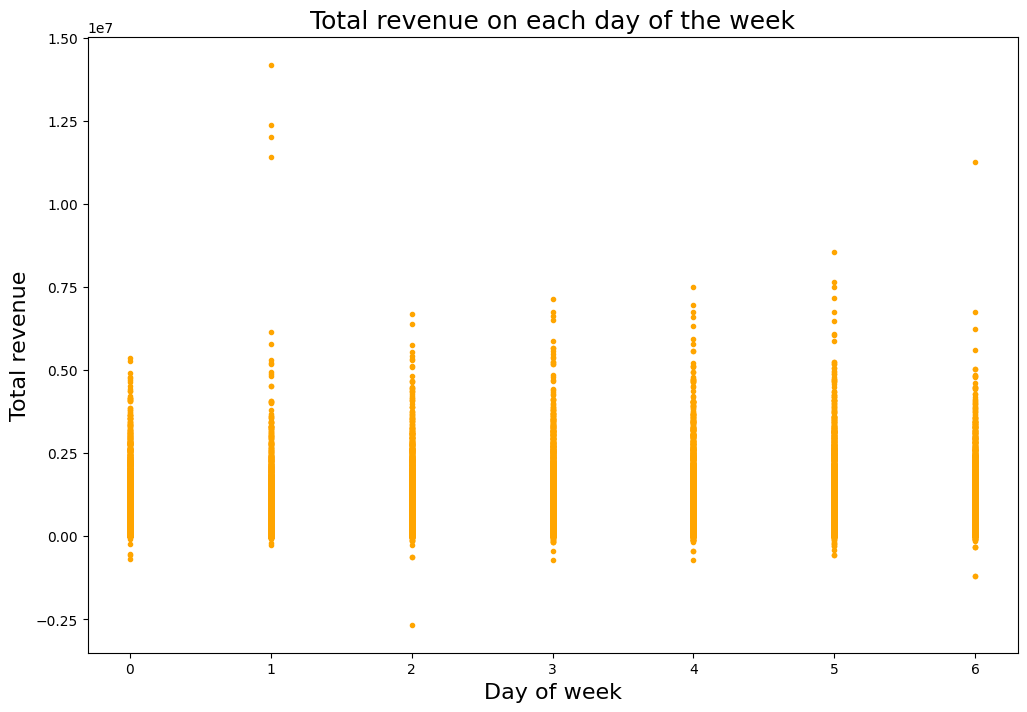

In [ ]:
# Scatter plot - Total revenue on each day of the week
figure(figsize=(12,8))
plt.scatter(df_3['day_of_week'],df_3['total_revenue'], marker='.', color='orange')
plt.title("Total revenue on each day of the week", fontsize=18)
plt.xlabel('Day of week', fontsize=16)  ### can we change 0,1,...,6 to sun,mon,...,sat??
plt.ylabel('Total revenue', fontsize=16)
plt.show()

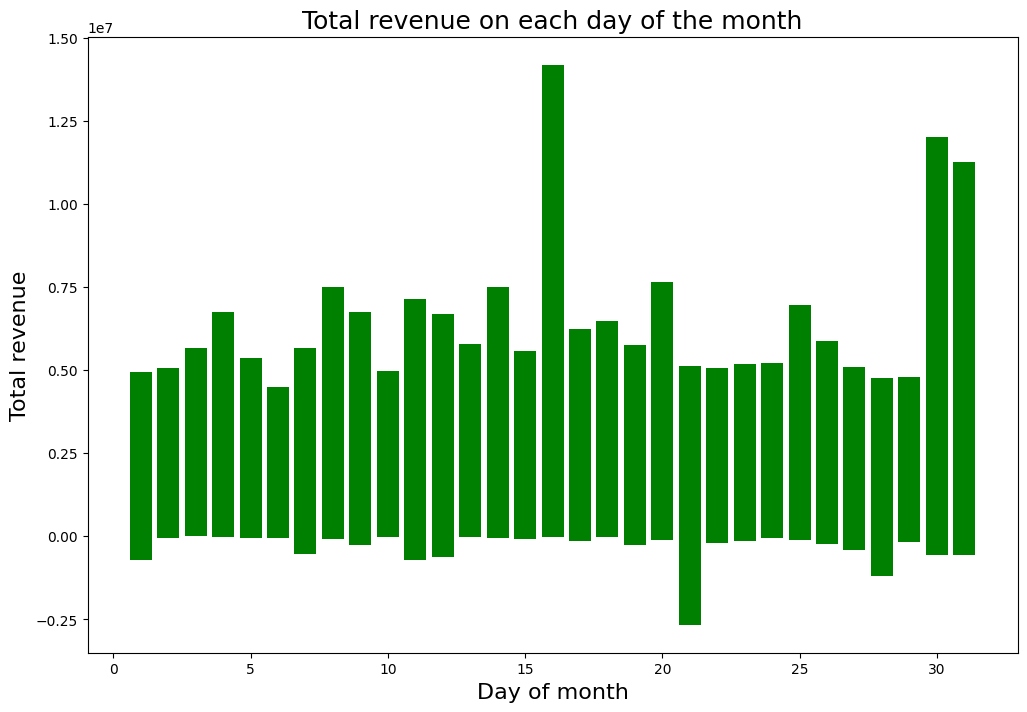

In [ ]:
figure(figsize=(12,8))
plt.bar(df_3['day_of_month'],df_3['total_revenue'], color='green')
plt.title("Total revenue on each day of the month", fontsize=18)
plt.xlabel('Day of month', fontsize=16)
plt.ylabel('Total revenue', fontsize=16)
plt.show()

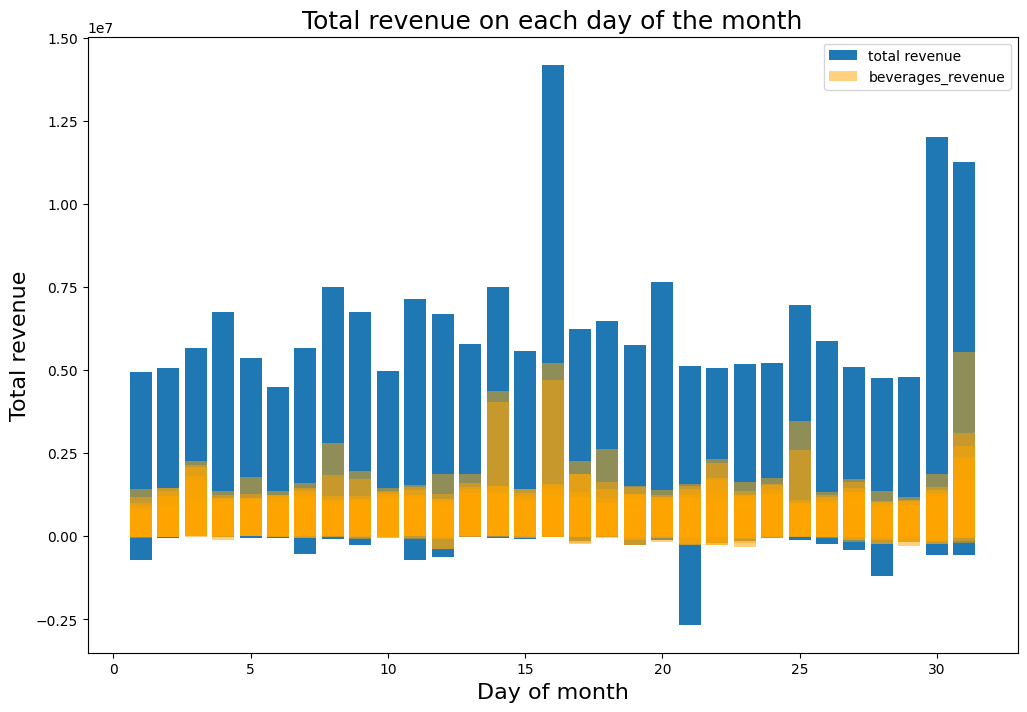

In [ ]:
figure(figsize=(12,8))
plt.bar(df_2['day_of_month'],df_2['total_revenue'])
plt.bar(df_2['day_of_month'],df_2['beverages_revenue'], color='orange', alpha=0.5)
plt.legend(labels=['total revenue','beverages_revenue'])
plt.title("Total revenue on each day of the month", fontsize=18)
plt.xlabel('Day of month', fontsize=16)
plt.ylabel('Total revenue', fontsize=16)
plt.show()

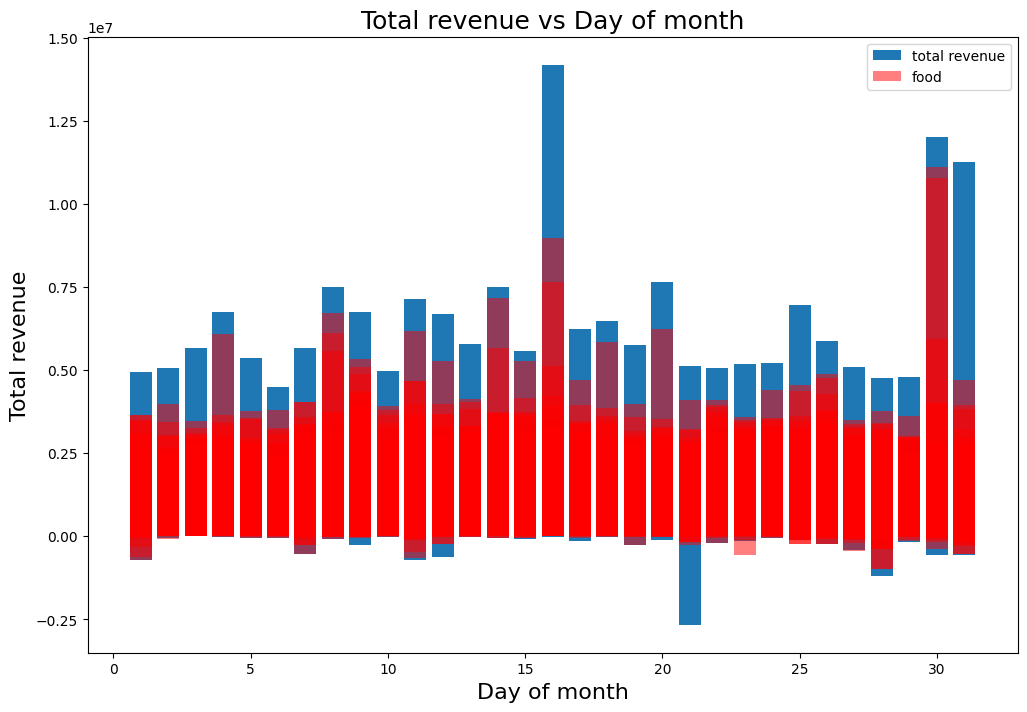

In [ ]:
figure(figsize=(12,8))
plt.bar(df_2['day_of_month'],df_2['total_revenue'])
plt.bar(df_2['day_of_month'],df_2['food_revenue'], color='red', alpha=0.5)
plt.legend(labels=['total revenue','food'])
plt.title("Total revenue vs Day of month", fontsize=18)
plt.xlabel('Day of month', fontsize=16)
plt.ylabel('Total revenue', fontsize=16)
plt.show()

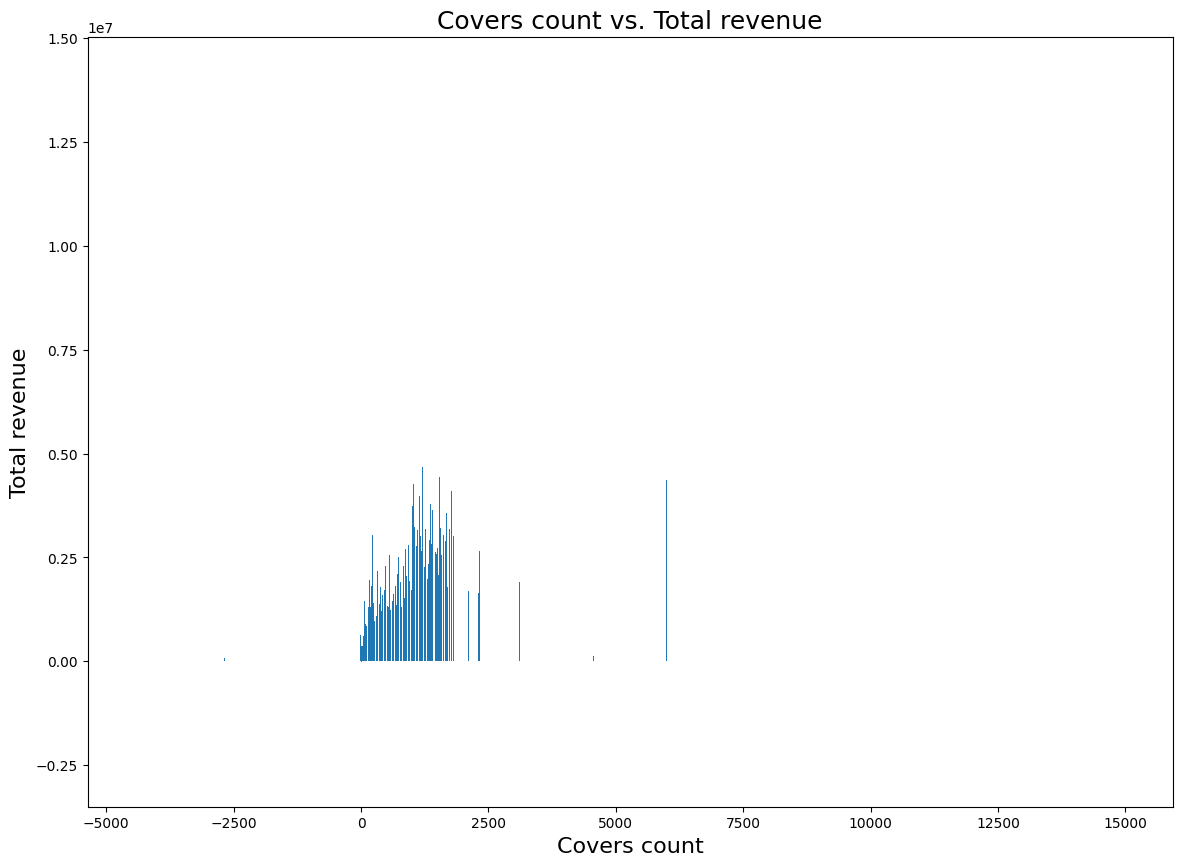

In [ ]:
figure(figsize=(10,8))
plt.bar(df_2['total_covers'],df_2['total_revenue'])
plt.title("Covers count vs. Total revenue", fontsize=18)
plt.xlabel('Covers count', fontsize=16)
plt.ylabel('Total revenue', fontsize=16)
plt.show()

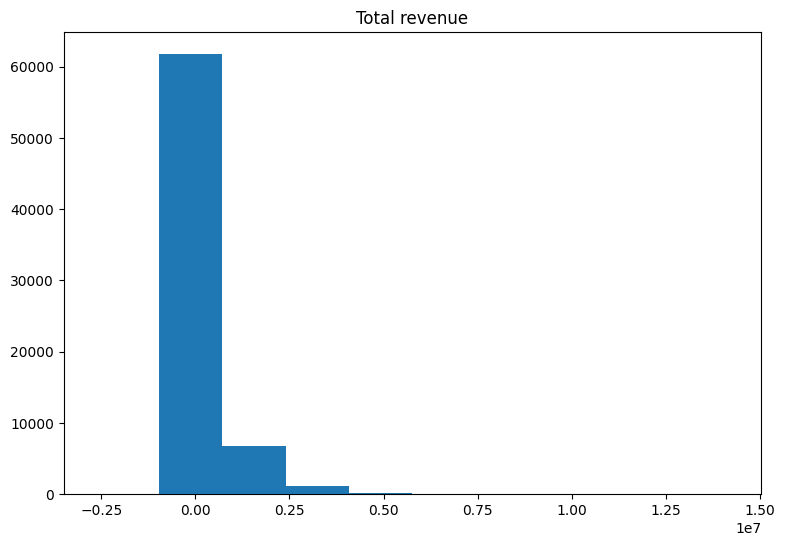

'In histogram the Y-axis shows the number of times that the values occurred within the intervals set by the X-axis. \nThe bars: The height of the bar shows the number of times that the values occurred within the interval, \nwhile the width of the bar shows the interval that is covered.'

In [ ]:
figure(figsize=(9,6))
plt.hist(x=df_2.total_revenue, histtype='stepfilled')
plt.title("Total revenue")
plt.show()


'''In histogram the Y-axis shows the number of times that the values occurred within the intervals set by the X-axis.
The bars: The height of the bar shows the number of times that the values occurred within the interval,
while the width of the bar shows the interval that is covered.'''

# what is on the y-axis here?
# It shows how many times the restaurant have generated total revenue in that particular range.
# y axis shows number of times. x axis shows the total revenue range.

In [ ]:
# Creating a dataframe for each day of the week -
df0 = df_2[df_2.day_of_week == 0]
df1 = df_2[df_2.day_of_week == 1]
df2 = df_2[df_2.day_of_week == 2]
df3 = df_2[df_2.day_of_week == 3]
df4 = df_2[df_2.day_of_week == 4]
df5 = df_2[df_2.day_of_week == 5]
df6 = df_2[df_2.day_of_week == 6]

In [ ]:
# Creating a function to drop unnecessary columns in the dataframe for a particular day of the week -
def create_day_of_week_df(df):
  df=df.drop(columns=['restaurant_id','total_covers','day_of_year','week_of_year','week_of_month','beverages_revenue','food_revenue','other_revenue'])
  df

In [ ]:
create_day_of_week_df(df0)
create_day_of_week_df(df1)
create_day_of_week_df(df2)
create_day_of_week_df(df3)
create_day_of_week_df(df4)
create_day_of_week_df(df5)
create_day_of_week_df(df6)

In [ ]:
df0

,restaurant_id,month,year,day_of_week,day_of_month,day_of_year,week_of_month,week_of_year,total_covers,total_revenue,...,breakfast_revenue,lunch_revenue,dinner_revenue,breakfast_covers,lunch_covers,dinner_covers,total_apc,breakfast_apc,lunch_apc,dinner_apc
4,556,5,2022,0,8,128,1,20,282,73062.0,...,14567.0,19417.0,39078.0,121,46,114,259.083704,120.388430,422.108696,342.789474
10,556,5,2022,0,15,135,2,21,257,48276.0,...,13548.0,15150.0,19578.0,136,52,70,187.843883,99.617647,291.346154,279.685714
16,556,5,2022,0,22,142,3,22,593,43242.0,...,10909.0,17465.0,14868.0,260,173,160,72.920012,41.957692,100.953757,92.925000
23,556,5,2022,0,29,149,4,23,0,53916.0,...,15955.0,25619.0,12342.0,0,0,0,0.000000,0.000000,0.000000,0.000000
30,556,3,2021,0,7,66,1,11,438,110134.0,...,25762.0,25764.0,58609.0,240,54,144,251.185735,107.341667,477.111111,407.006944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69727,556,4,2022,0,3,93,0,15,343,67332.0,...,15535.0,14531.0,37266.0,142,82,119,196.303831,109.401409,177.207317,313.159664
69733,556,4,2022,0,10,100,1,16,289,51516.0,...,14248.0,14698.0,22570.0,135,65,89,178.256000,105.540741,226.123077,253.595506
69739,556,4,2022,0,17,107,2,17,347,50640.0,...,16557.0,13215.0,20869.0,158,70,119,145.937838,104.791139,188.785714,175.369748
69745,556,4,2022,0,24,114,3,18,0,71737.0,...,30971.0,25599.0,15167.0,0,0,0,0.000000,0.000000,0.000000,0.000000


Similar to the above dataframe, the dataframes for all the days of the week will be created

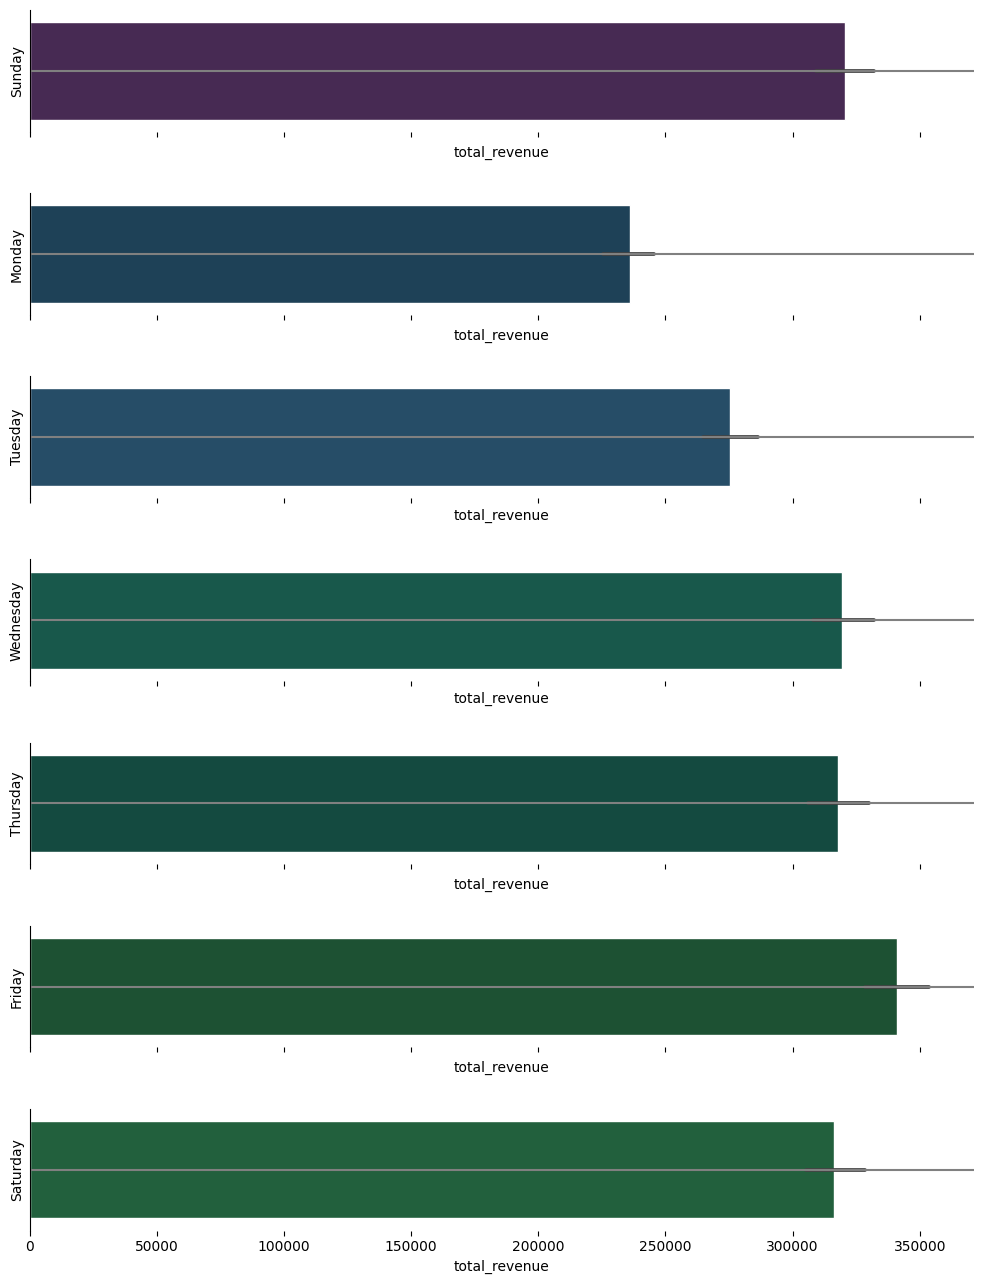

In [ ]:
# Plotting revenue for each day of the week -

f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(7, 1, figsize=(10, 13), sharex=True)
sns.set_theme(palette='bright')

sns.barplot(x=df0['total_revenue'], color='#4A235A', ax=ax1)
ax1.axhline(0, color='grey')
ax1.set_ylabel("Sunday")

sns.barplot(x=df1['total_revenue'], color='#154360', ax=ax2)
ax2.axhline(0, color="grey")
ax2.set_ylabel("Monday")

sns.barplot(x=df2['total_revenue'], color='#1B4F72', ax=ax3)
ax3.axhline(0, color="grey")
ax3.set_ylabel("Tuesday")

sns.barplot(x=df3['total_revenue'], color='#0E6251', ax=ax4)
ax4.axhline(0, color="grey")
ax4.set_ylabel("Wednesday")

sns.barplot(x=df4['total_revenue'], color='#0B5345', ax=ax5)
ax5.axhline(0, color="grey")
ax5.set_ylabel("Thursday")

sns.barplot(x=df5['total_revenue'], color='#145A32', ax=ax6)
ax6.axhline(0, color="grey")
ax6.set_ylabel("Friday")

sns.barplot(x=df6['total_revenue'], color='#186A3B', ax=ax7)
ax7.axhline(0, color="grey")
ax7.set_ylabel("Saturday")

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

The above figure shows that the highest revenue was generated on Saturday, followed by Friday and Sunday.

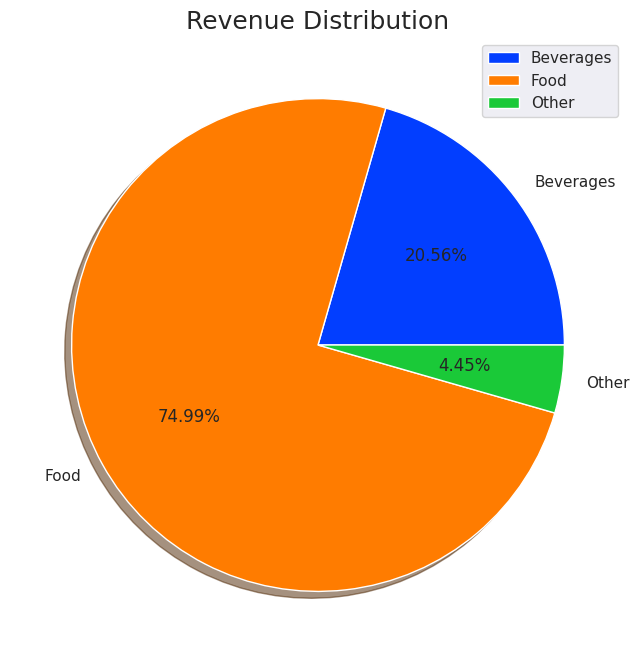

In [ ]:
rev = np.array([df_2["beverages_revenue"].sum(),df["food_revenue"].sum(),df["other_revenue"].sum()])
mylabels = ["Beverages", "Food", "Other"]
figure(figsize=(8,8))
plt.pie(rev, labels = mylabels,autopct='%1.2f%%',shadow=True)
plt.title("Revenue Distribution", fontsize=18)
plt.legend()
plt.show()

This pie chart shows that food generates the most revenue, followed by beverages and others.

Checking total value and value for each month (to check if correct values are being calculated):

In [ ]:
df_2["beverages_revenue"].sum()

4360425735.77147

In [ ]:
df_2.query("month==1")["beverages_revenue"].sum()

475441607.72

Plotting the pie chart of food, beverage and others month-wise

In [ ]:
# This function plots pie charts showing percentage of revenue distribution from food, beverage and others month-wise

def print_pie_monthly_revenue(mylabels,months,rows,cols):
  fig, axis = plt.subplots(rows,cols,figsize=(18,18))
  fig.suptitle("Revenue distribution of food, beverages and others over each month",fontsize=20)
  m=1
  for i in range(0,rows):
    for j in range(0,cols):
      rev = np.array([df_2.query(f"month=={m}")["beverages_revenue"].sum(),df_2.query(f"month=={m}")["food_revenue"].sum(),df_2.query(f"month=={m}")["other_revenue"].sum()])
      axis[i, j].pie(rev, labels = mylabels,autopct='%1.2f%%',shadow=True)
      axis[i, j].set_title(f"Revenue Distribution for {months[m-1]}", fontsize=12)
      m+=1
  plt.show()

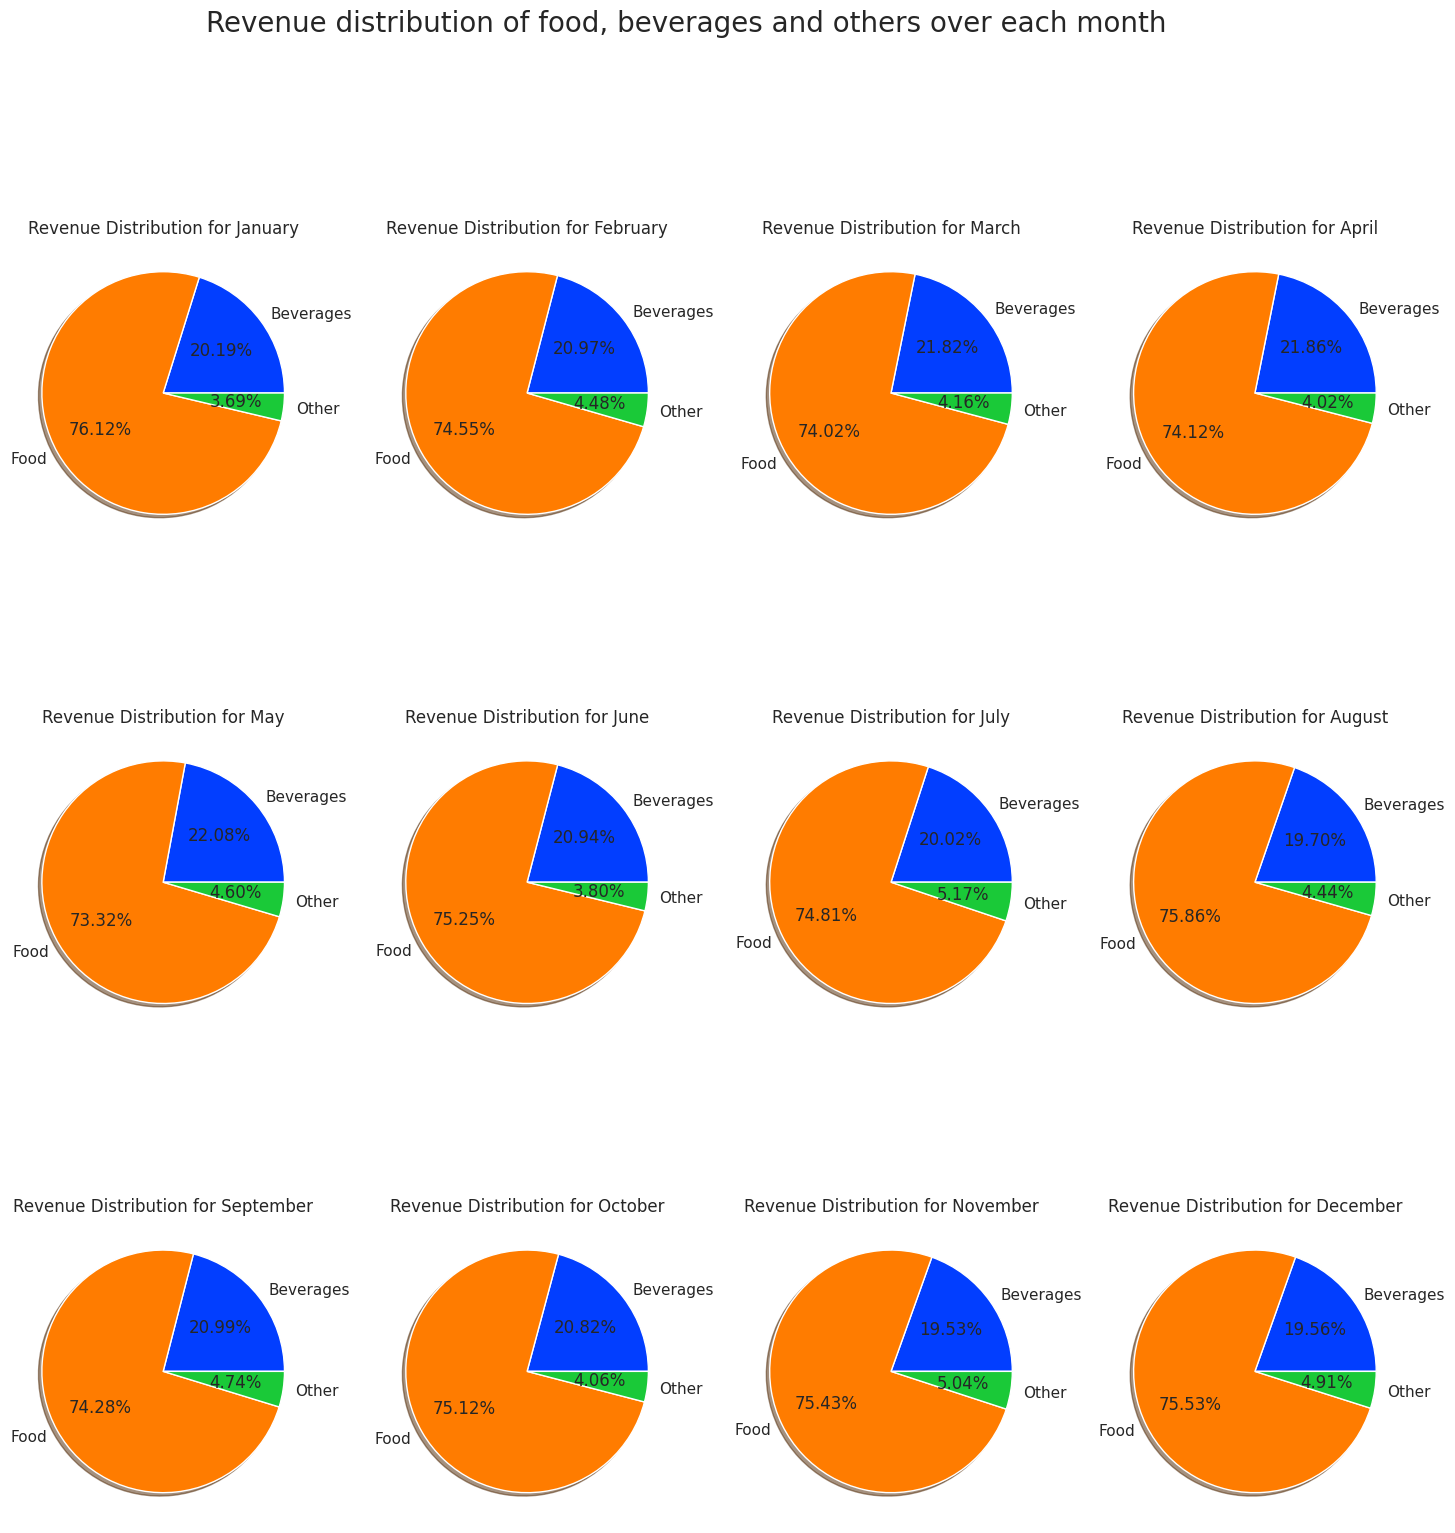

In [ ]:
mylabels = ["Beverages", "Food", "Other"]
months = ['January','February','March','April','May','June','July','August','September','October','November','December']
print_pie_monthly_revenue(mylabels,months,3,4)